# Final Project Conclusions

# Overview

In [1]:
import io
import pandas as pd

import numpy as np

from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, f1_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns
sns.set(style = 'darkgrid', context = 'talk')

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import cleaned_data from expected_goals_data_cleaning_notebook

cleaned_data = pd.read_csv('./final_statsbomb_data/cleaned_data.csv')

In [3]:
cleaned_data = cleaned_data.iloc[: , 1:]
cleaned_data.head()

,statsbomb_xg,goal,time,player,team,shot_distance,inside_18,shot_angle,bodypart,technique,first_touch,assist,state_of_play
0,0.157454,False,0,Khadija Monifa Shaw,Manchester City WFC,13.231024,True,55.47,Right Foot,Volley,True,Low Pass,Open Play - Shot
1,0.089495,False,2,Khadija Monifa Shaw,Manchester City WFC,9.481034,True,52.28,Left Foot,Volley,True,High Pass,Open Play - Shot
2,0.009850,False,4,Laura Coombs,Manchester City WFC,26.109385,False,60.39,Right Foot,Ground,False,Ground Pass,Open Play - Shot
3,0.115049,False,4,Khadija Monifa Shaw,Manchester City WFC,13.607718,True,29.01,Left Foot,Ground,True,Ground Pass,Open Play - Shot
4,0.015118,False,5,Ingrid Filippa Angeldal,Manchester City WFC,34.558356,False,77.97,Right Foot,Ground,False,Ground Pass,Open Play - Shot


In [4]:
# Import X_train, X_test, y_train, and y_test from expected_goals_data_cleaning_notebook and
# expected_goals_modeling_notebook

X_train_os = pd.read_csv('./final_statsbomb_data/data_modeling/X_train_os.csv')
y_train_os = pd.read_csv('./final_statsbomb_data/data_modeling/y_train_os.csv')

X_test = pd.read_csv('./final_statsbomb_data/data_preprocessing/X_test.csv')
y_test = pd.read_csv('./final_statsbomb_data/data_preprocessing/y_test.csv')

X = pd.read_csv('./final_statsbomb_data/data_preprocessing/X.csv')
y = pd.read_csv('./final_statsbomb_data/data_preprocessing/y.csv')

In [5]:
X_train_os = X_train_os.iloc[: , 1:]
y_train_os = y_train_os.iloc[: , 1:]

X_test = X_test.iloc[: , 1:]
y_test = y_test.iloc[: , 1:]

X = X.iloc[: , 1:]
y = y.iloc[: , 1:]

In [6]:
# Load models trained in expected_goals_modeling_notebook

lr = pickle.load(open('./final_statsbomb_data/data_modeling/lr.pkl', 'rb'))
kn = pickle.load(open('./final_statsbomb_data/data_modeling/kn.pkl', 'rb'))
dt = pickle.load(open('./final_statsbomb_data/data_modeling/dt.pkl', 'rb'))
bc = pickle.load(open('./final_statsbomb_data/data_modeling/bc.pkl', 'rb'))
vc = pickle.load(open('./final_statsbomb_data/data_modeling/vc.pkl', 'rb'))

In [7]:
# Generate model report

def model_report(train,
                 train_prediction):
  report = pd.DataFrame(classification_report(train,
                                              train_prediction,
                                              output_dict = True))
  display(report)

In [8]:
 # Calculate model ROC AUC, Visualize ROC Curve

def model_roc(train,
              train_probability):
  print('Area Under the Curve:',
        round(roc_auc_score(train,
                            train_probability[:,1]),2))
  
  fpr_train, tpr_train, thresholds_train = roc_curve(train, 
                                                     train_probability[:,1])
    
  f, ax = plt.subplots(figsize = (10, 10))
  
  plt.plot(fpr_train,
           tpr_train,
           'aqua',
           label = 'Train')
  
  plt.plot([0, 1],
           [0, 1],
           'purple')
  
  ax.set_title('Receiver Operating Characteristic')
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.legend(bbox_to_anchor = (1.05, 1),
            loc = 2,
            borderaxespad = 0);

In [9]:
# Visualize distribution of continuous variable feature shots and goals

def int_feature_v_goal(feature,
                       xlabel):
    f, ax = plt.subplots(figsize=(10, 10))
    sns.set_palette(sns.color_palette(['plum', 'purple']))
    sns.histplot(data = cleaned_data,
                 ax = ax,
                 multiple = 'stack',
                 x = feature,
                 hue = 'goal',
                 element = 'bars')
    ax.set_title('Goals v Shots by ' + xlabel)
    ax.set_xlabel(xlabel)
    ax.legend(labels = ['Goal',
                        'Miss'],
              bbox_to_anchor = (1.05, 1),
              loc = 2,
              borderaxespad = 0);

In [10]:
# Visualize distribution of categorical variable feature shots and goals

def category_feature_v_goal(feature,
                            xlabel):
    f, ax = plt.subplots(figsize=(10, 10))
    sns.set_palette(sns.color_palette(['plum', 'purple']))
    sns.histplot(data = cleaned_data,
                 ax = ax,
                 multiple = 'stack',
                 x = feature,
                 hue = 'goal',
                 element = 'bars')
    ax.set_title('Goals v Shots by ' + xlabel)
    ax.set_xlabel(xlabel)
    ax.legend(labels = ['Goal',
                        'Miss'],
              bbox_to_anchor = (1.05, 1),
              loc = 2,
              borderaxespad = 0);

In [11]:
# Visualize distribution of boolean variable feature shots and goals

def boolean_feature_v_goal(feature,
                            xlabel):
    f, ax = plt.subplots(figsize=(10, 10))
    sns.set_palette(sns.color_palette(['plum', 'purple']))
    sns.histplot(data = cleaned_data,
                 ax = ax,
                 multiple = 'stack',
                 x = feature,
                 hue = 'goal',
                 element = 'bars')
    ax.set_title('Goals v Shots by ' + xlabel)
    ax.set_xlabel(xlabel)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['False', 'True'])
    ax.legend(labels = ['Goal', 'Miss'],
             bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0);

# Best Performing Models

## K Neighbors

In [12]:
kn_predict = kn.predict(X)
kn_probability = kn.predict_proba(X)

In [13]:
print('Report')
model_report(y, kn_predict)

Report


,False,True,accuracy,macro avg,weighted avg
precision,0.956522,0.222222,0.696629,0.589372,0.878141
recall,0.691824,0.736842,0.696629,0.714333,0.696629
f1-score,0.802920,0.341463,0.696629,0.572192,0.753663
support,159.000000,19.000000,0.696629,178.000000,178.000000


Area Under the Curve: 0.82


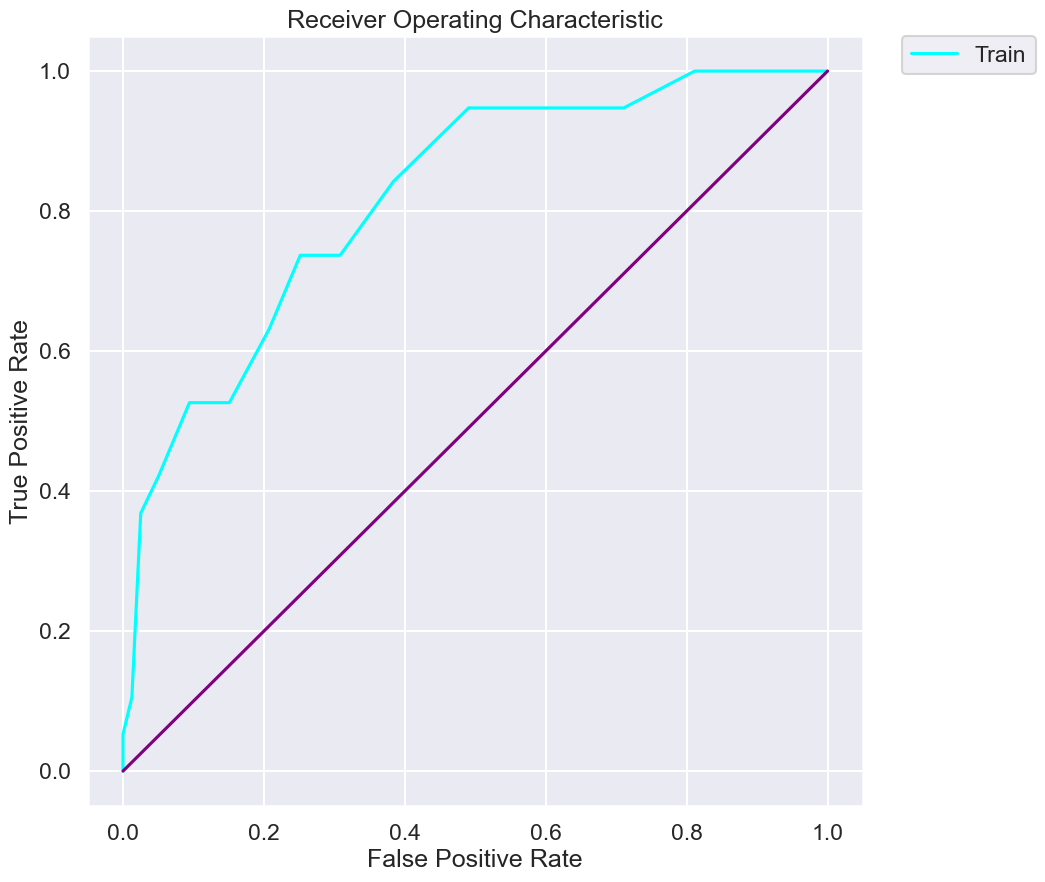

In [14]:
model_roc(y, kn_probability)

## Voting Classifier

In [15]:
vc_predict = vc.predict(X)
vc_probability = vc.predict_proba(X)

In [16]:
print('Report')
model_report(y, vc_predict)

Report


,False,True,accuracy,macro avg,weighted avg
precision,0.959677,0.259259,0.747191,0.609468,0.884914
recall,0.748428,0.736842,0.747191,0.742635,0.747191
f1-score,0.840989,0.383562,0.747191,0.612276,0.792163
support,159.000000,19.000000,0.747191,178.000000,178.000000


Area Under the Curve: 0.84


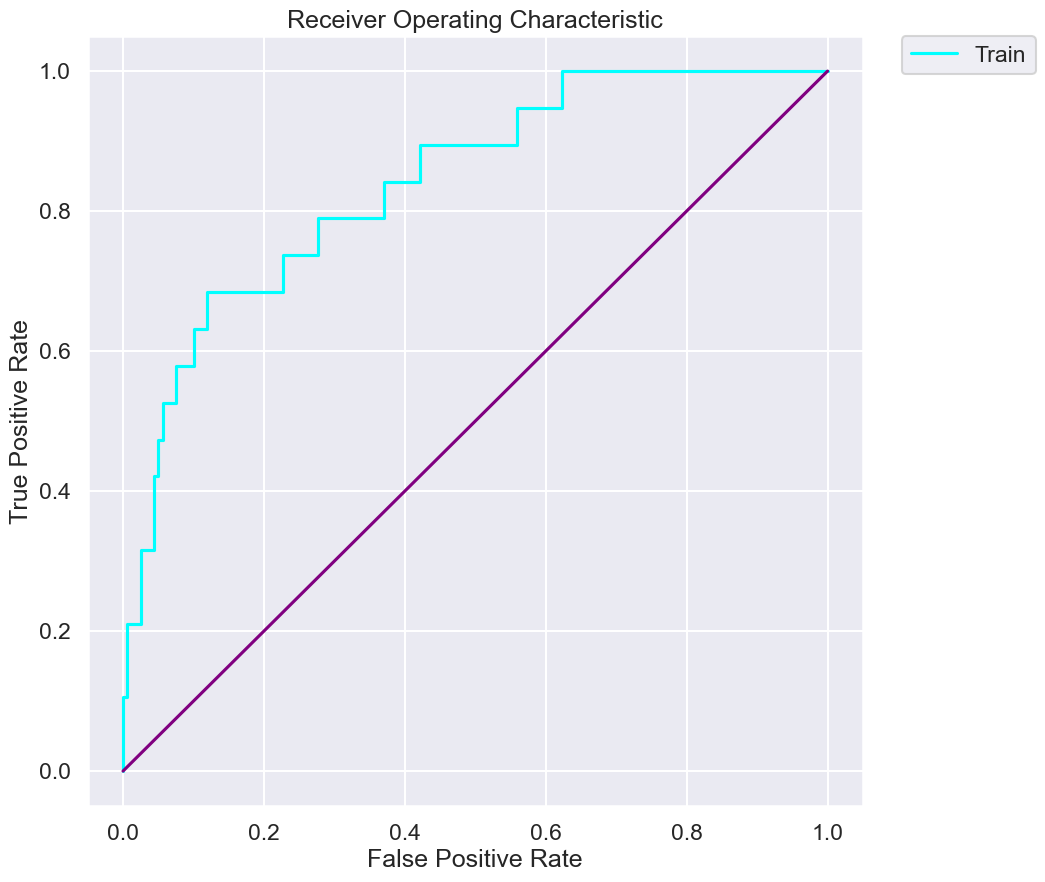

In [17]:
model_roc(y, vc_probability)

## Logistic Regression

In [18]:
lr_predict = lr.predict(X)
lr_probability = lr.predict_proba(X)

In [19]:
print('Report')
model_report(y, lr_predict)

Report


,False,True,accuracy,macro avg,weighted avg
precision,0.961240,0.285714,0.775281,0.623477,0.889134
recall,0.779874,0.736842,0.775281,0.758358,0.775281
f1-score,0.861111,0.411765,0.775281,0.636438,0.813147
support,159.000000,19.000000,0.775281,178.000000,178.000000


Area Under the Curve: 0.83


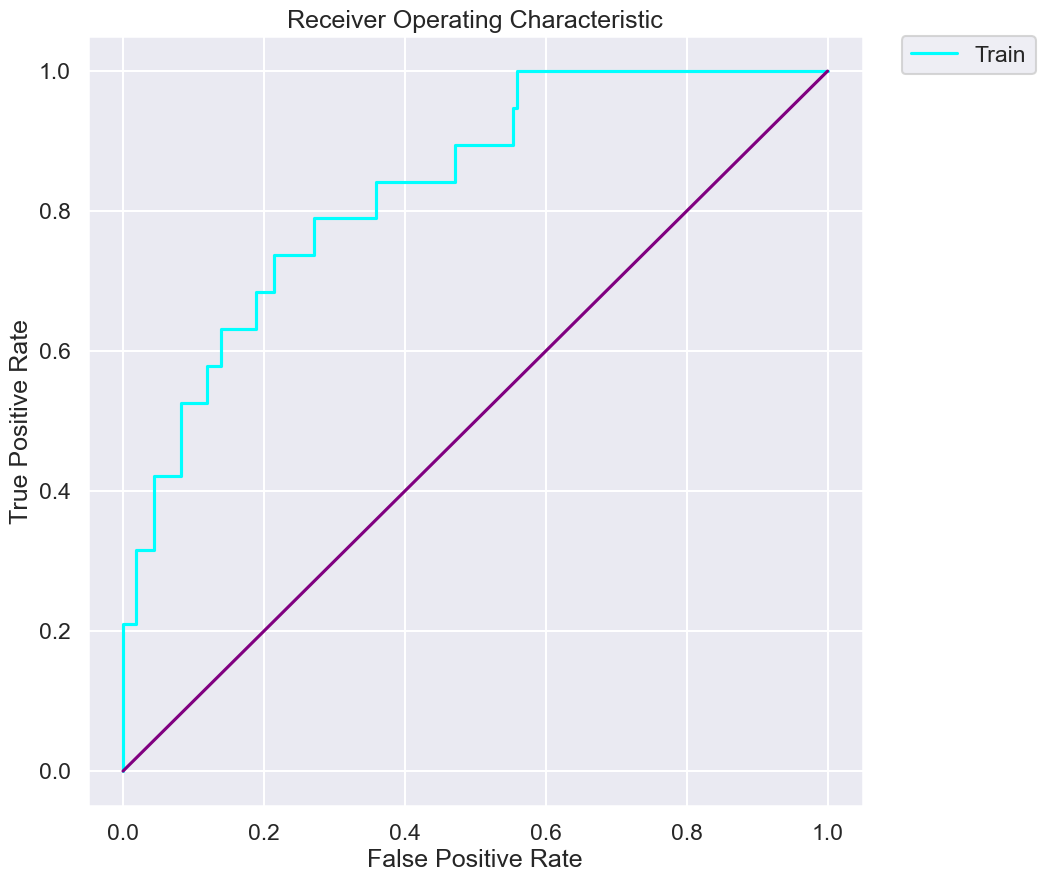

In [20]:
model_roc(y, lr_probability)

# Model Comparison

In [21]:
model_names = ['K Neighbors','Logistic Regression', 'Voting Classifier']

model_comparison = pd.DataFrame(model_names, columns = ['Model'])

probabilities = [kn_probability, lr_probability, vc_probability]

predictions = [kn_predict, lr_predict, vc_predict]

recall_scores = []
for p in predictions:
    recall_scores.append(round((recall_score(y, p)), 2))

model_comparison['Recall'] = recall_scores

roc_scores = []
for p in probabilities:
    roc_scores.append(round((roc_auc_score(y, p[:,1])), 2))

model_comparison['ROC'] = roc_scores

accuracy_scores = []
for p in predictions:
    accuracy_scores.append(round((accuracy_score(y, p)), 2))

model_comparison['Accuracy'] = accuracy_scores

model_comparison.sort_values('Recall',
                             ascending = False,
                             inplace = True)

model_comparison

,Model,Recall,ROC,Accuracy
0,K Neighbors,0.74,0.82,0.70
1,Logistic Regression,0.74,0.83,0.78
2,Voting Classifier,0.74,0.84,0.75


**Voting Classifier** will be the selected model

# Applying xG to Broader Data

In [22]:
# Create DataFrame of intial Extracted, Organized, and Cleaned Data with xG

final_data = cleaned_data
final_data['xG'] = vc_probability[:,1]
final_data.drop('statsbomb_xg',
                axis = 1,
                inplace = True)

In [23]:
final_data['xG'].describe()

count    178.000000
mean       0.381085
std        0.245176
min        0.000374
25%        0.176134
50%        0.340501
75%        0.565982
max        0.944993
Name: xG, dtype: float64

# Goals Baseline

In [24]:
print('Ratio of Goals:',
      round(((len(cleaned_data[cleaned_data['goal'] == True]) /
      len(cleaned_data)) * 100), 2), '%')

Ratio of Goals: 10.67 %


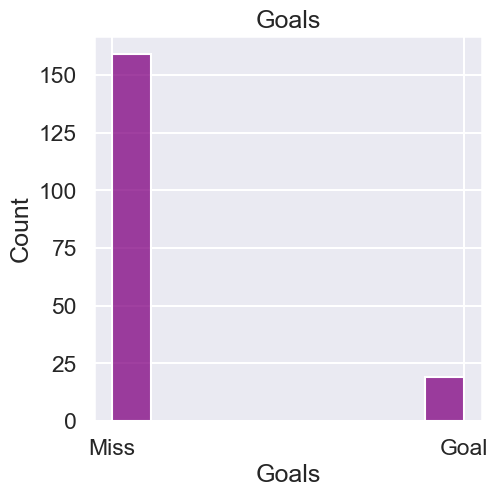

In [25]:
# Visualize ratio of goals

f, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data = cleaned_data,
             ax = ax,
             stat = 'count',
             multiple = 'stack',
             x = 'goal',
             kde = False,
             color = 'purple',
             element = 'bars',
             legend = False)
ax.set_title('Goals')
ax.set_xlabel('Goals')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Miss', 'Goal']);

## Shot Distance

As expected, shot_distance has the highest impact toward the likelihood of a goal.

In [30]:
cleaned_data['shot_distance'].describe()

count    178.000000
mean      17.299322
std        8.630480
min        3.101612
25%       10.126433
50%       16.328760
75%       23.794325
max       51.200098
Name: shot_distance, dtype: float64

In [31]:
# Create a dataframe of shot distance intervals

shot_distance_intervals = ['<10', '10-20', '20-30', '30-40',
                           '40-50', '50-60', '>60']
distance_ratios = pd.DataFrame(shot_distance_intervals)

# Calculate ratio of shots and goals in 10-yard intervals from goal_center
shot_distance_ratios = []
goal_distance_ratios = []
goal_shot_distance_ratios = []
for i in range(0, 70, 10):
    shot_distance_count = len(cleaned_data[(cleaned_data['shot_distance'] > i) &
                                           (cleaned_data['shot_distance'] < (i + 10))])
    goal_distance_count = len(cleaned_data[(cleaned_data['shot_distance'] > i) &
                                           (cleaned_data['shot_distance'] < (i + 10)) &
                                           (cleaned_data['goal'] == True)])

    shot_distance_ratios.append(round((shot_distance_count / len(cleaned_data)) * 100, 2))
    goal_distance_ratios.append(round((goal_distance_count / len(cleaned_data[cleaned_data['goal'] == True])) * 100, 2))

    if shot_distance_count > 0:
        goal_shot_distance_ratios.append(round((goal_distance_count / shot_distance_count) * 100, 2))
    else:
        goal_shot_distance_ratios.append(0)

distance_ratios['Ratio of Total Shots'] = shot_distance_ratios
distance_ratios['Ratio of Total Goals'] = goal_distance_ratios
distance_ratios['Ratio of Goals within Interval'] = goal_shot_distance_ratios

distance_ratios.rename(columns={distance_ratios.columns[0]: 'Distance'},
                       inplace=True)

distance_ratios


,Distance,Ratio of Total Shots,Ratio of Total Goals,Ratio of Goals within Interval
0,<10,24.16,57.89,25.58
1,10-20,41.01,31.58,8.22
2,20-30,25.84,10.53,4.35
3,30-40,7.87,0.00,0.00
4,40-50,0.56,0.00,0.00
5,50-60,0.56,0.00,0.00
6,>60,0.00,0.00,0.00


In [32]:
print('Ratio of Shots Within 30-Yards:',
      (round((len(cleaned_data[(cleaned_data['shot_distance'] < 30)]) /
              (len(cleaned_data)) * 100), 2)), '%')
print('Ratio of Goals Within 20-Yards:',
      (round((len(cleaned_data[(cleaned_data['shot_distance'] < 20) &
                               cleaned_data['goal'] == True]) /
              (len(cleaned_data[cleaned_data['goal'] == True])) * 100), 2)), '%')

Ratio of Shots Within 30-Yards: 91.01 %
Ratio of Goals Within 20-Yards: 89.47 %


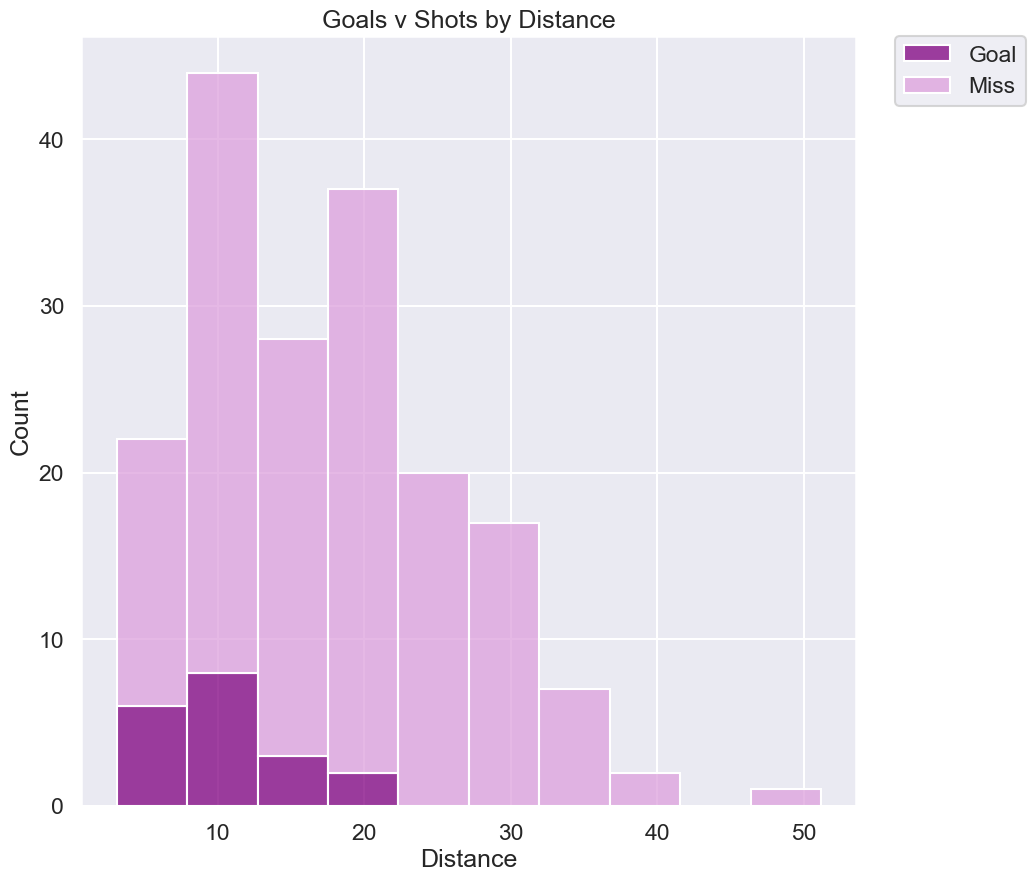

In [34]:
int_feature_v_goal('shot_distance','Distance')

### NEED TO CHANGE THIS BLOCK

The distribution of shots skews toward the 10-20 yard range. 

Similarly, the ratio of shots within the 0-20 yard range resulting in a goal is also higher and also higher than the average ratio of goals from total shots.

Inside the 18 indicates similar correlation with the ratio of goals from occuring inside the 18-yard box being significantly higher than outside the 18-yard box. 

**Conclusion**

Shots closer to goal have a higher likelihood of scoring, so these should be heavily prioritized.

## Shot Angle

shot_angle also appears to have a higher correlations with the likelihood of goal.

In [37]:
cleaned_data['shot_angle'].describe()

count    178.000000
mean      92.877247
std       35.702345
min       11.660000
25%       66.085000
50%       91.395000
75%      119.352500
max      174.520000
Name: shot_angle, dtype: float64

In [38]:
# Create a dataframe of shot angle intervals

shot_angle_intervals = ['<10', '10-20', '20-30', '30-40', '40-50',
                        '50-60', '60-70', '70-80', '>80']

shot_angle_ratios = pd.DataFrame(shot_angle_intervals)

shot_angle_ratios.rename(columns = {shot_angle_ratios.columns[0] : 'Angle from Center' },
                         inplace = True)

# Calculate ratio of total shots in 10-degree intervals from center
left_angle_goal_shot_ratios = []
for i in range(90, 180, 10):
    goal_count = len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                   (cleaned_data['shot_angle'] < (i + 10)) &
                                   (cleaned_data['goal'] == True)])
    shot_count = len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                   (cleaned_data['shot_angle'] < (i + 10))])

    if shot_count > 0:
        left_angle_goal_shot_ratios.append(round((goal_count / shot_count) * 100, 2))
    else:
        left_angle_goal_shot_ratios.append(0)

shot_angle_ratios['Left - Ratio Goals within Interval'] = left_angle_goal_shot_ratios

right_angle_goal_shot_ratios = []
for i in range(0, 90, 10):
    goal_count = len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                   (cleaned_data['shot_angle'] < (i + 10)) &
                                   (cleaned_data['goal'] == True)])
    shot_count = len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                   (cleaned_data['shot_angle'] < (i + 10))])

    if shot_count > 0:
        right_angle_goal_shot_ratios.append(round((goal_count / shot_count) * 100, 2))
    else:
        right_angle_goal_shot_ratios.append(0)

shot_angle_ratios['Right - Ratio Goals within Interval'] = right_angle_goal_shot_ratios
shot_angle_ratios['Right - Ratio Goals within Interval'] = shot_angle_ratios['Right - Ratio Goals within Interval'].values[::-1]

shot_angle_ratios


,Angle from Center,Left - Ratio Goals within Interval,Right - Ratio Goals within Interval
0,<10,15.00,13.33
1,10-20,7.14,7.69
2,20-30,27.78,5.88
3,30-40,0.00,8.33
4,40-50,6.25,12.50
5,50-60,0.00,25.00
6,60-70,0.00,0.00
7,70-80,0.00,0.00
8,>80,0.00,0.00


In [39]:
# Create a dataframe for shot side

side_list = ['Right',
             'Left']

side_ratio = pd.DataFrame(side_list)

side_ratio.rename(columns = {side_ratio.columns[0] : 'Side' },
                            inplace = True)

# Calculate ratio of shots and goals side

side_shot_ratio = [(round((len(cleaned_data[cleaned_data['shot_angle'] < 90]) /
                           len(cleaned_data)) * 100, 2)),
                   (round((len(cleaned_data[cleaned_data['shot_angle'] > 90]) /
                           len(cleaned_data)) * 100, 2))]

side_goal_ratio = [(round((len(cleaned_data[(cleaned_data['shot_angle'] < 90) &
                                            cleaned_data['goal'] == True]) /
                           len(cleaned_data[cleaned_data['goal'] == True])) * 100, 2)),
                   (round((len(cleaned_data[(cleaned_data['shot_angle'] > 90) &
                                            cleaned_data['goal'] == True]) /
                           len(cleaned_data[cleaned_data['goal'] == True])) * 100, 2))]

side_shot_goal_ratio = [(round(((len(cleaned_data[(cleaned_data['shot_angle'] < 90) &
                                                 (cleaned_data['goal'] == True)])) /
                                (len(cleaned_data[(cleaned_data['shot_angle'] < 90)]))) * 100, 2)),
                        (round(((len(cleaned_data[(cleaned_data['shot_angle'] > 90) &
                                                 (cleaned_data['goal'] == True)])) /
                                (len(cleaned_data[(cleaned_data['shot_angle'] > 90)]))) * 100, 2))]

side_ratio['Ratio Total Shots'] = side_shot_ratio
side_ratio['Ratio Total Goals'] = side_goal_ratio
side_ratio['Ratio Goals from Side'] = side_shot_goal_ratio

side_ratio

,Side,Ratio Total Shots,Ratio Total Goals,Ratio Goals from Side
0,Right,45.51,42.11,9.88
1,Left,53.93,52.63,10.42


In [40]:
print('Ratio of Total Shots within 45-Degrees from Center:',
      (round(((len(cleaned_data[(cleaned_data['shot_angle'] > 45) &
                                  (cleaned_data['shot_angle'] < 135)]) /
                   len(cleaned_data)) *
               100), 2)), '%')

print('Ratio of Total Goals within 45-Degrees from Center:',
      (round(((len(cleaned_data[(cleaned_data['shot_angle'] > 45) &
                                  (cleaned_data['shot_angle'] < 135) &
                                (cleaned_data['goal'] == True)]) /
                   len(cleaned_data[cleaned_data['goal'] == True])) *
               100), 2)), '%')

print('Ratio of Goals from Shots within 45-Degrees from Center:',
      (round(((len(cleaned_data[(cleaned_data['shot_angle'] > 45) &
                                  (cleaned_data['shot_angle'] < 135) &
                                (cleaned_data['goal'] == True)]) /
                   len(cleaned_data[(cleaned_data['shot_angle'] > 45) &
                                  (cleaned_data['shot_angle'] < 135)])) *
               100), 2)), '%')

Ratio of Total Shots within 45-Degrees from Center: 75.84 %
Ratio of Total Goals within 45-Degrees from Center: 84.21 %
Ratio of Goals from Shots within 45-Degrees from Center: 11.85 %


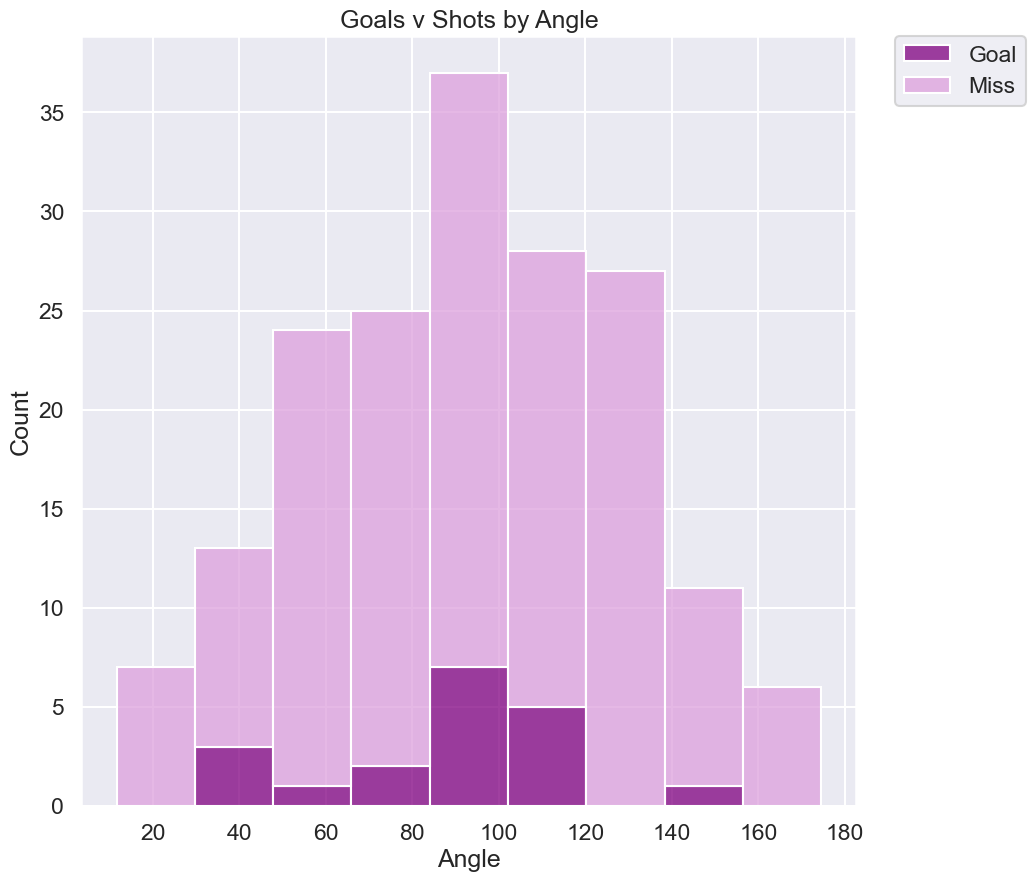

In [41]:
int_feature_v_goal('shot_angle','Angle')


The majority of shots are taken within a 50-degree angle from the center, with the distribution of total goals not differing significantly from the shot distribution.

However, the ratio of goals from shots left of center is significantly higher (*and holds true at all intervals*)

**Conclusion**

Shots from angles approximately 20-30 degrees have the highest likelihood of scoring, so these shots from this area should be prioritized as a target in the team's player training and tactical planning.

While the ratio of shots at wider angles  from center is lower, the ratio of goals from shots at those angles is significantly higher.

Extreme wide angles from center would naturally be closer to goal, due to the goals location on the endline.  Likely assists across the goal would be finished from an angle wider from center on the opposite side.

**Conclusion**

Considering the importance of Shot Distance as well as the correlation between very wide angle shots and goals, shots from wide angles and distances closer to goal should be prioritized as a target in the team's player training and tactical planning.

## Set Piece - Penalty

Set Piece - Penalty assuredly has a high importance due to the extremely high ratio of penalty shots which result in a goal.

In [43]:
print('Ratio of Goals from Penalties:',
      (round(((len(cleaned_data[(cleaned_data['state_of_play'] == 'Set Piece - Penalty') &
                                (cleaned_data['goal'] == True)]) /
                   len(cleaned_data[cleaned_data['state_of_play'] == 'Set Piece - Penalty'])) *
              100), 2)), '%')

Ratio of Goals from Penalties: 50.0 %


Penalties are out of our control, so we ignore this. 

# Filtering Data

In [44]:
# Filter dataframe

player_team_df = final_data[['player','team','goal','xG']]

# Calculate the difference between xG and actual goals

player_team_df['xG_differance'] = player_team_df['goal'] - player_team_df['xG']

player_team_df['xG'] = player_team_df['xG'].round(2)
player_team_df['xG_differance'] = player_team_df['xG_differance'].round(2)

## Applying to Players

In [45]:
player_df = player_team_df.groupby(['player']).sum()

### Top-10 Player xG

In [46]:
player_df = player_df.sort_values(by = ['xG'],
                                  ascending=False)

player_df.head(10)

,goal,xG,xG_differance
player,,,
Khadija Monifa Shaw,6,18.95,-12.95
Chloe Kelly,1,6.47,-5.47
Deyna Cristina Castellanos Naujenis,1,6.42,-5.42
Lauren Hemp,2,4.50,-2.50
Hayley Emma Raso,1,2.98,-1.98
Laura Coombs,1,2.39,-1.39
Kirsty Hanson,1,2.00,-1.00
Yui Hasegawa,1,1.78,-0.78
Esme Beth Morgan,0,1.78,-1.78


### Top-10 Player Goals

In [47]:
player_df = player_df.sort_values(by = ['goal'],
                                  ascending=False)

player_df.head(10)

,goal,xG,xG_differance
player,,,
Khadija Monifa Shaw,6,18.95,-12.95
Lauren Hemp,2,4.50,-2.50
Julie Blakstad,1,1.41,-0.41
Chloe Kelly,1,6.47,-5.47
Celin Bizet Ildhusøy,1,0.84,0.16
Katie Stengel,1,1.28,-0.28
Geum-Min Lee,1,1.29,-0.29
Rafaelle Leone Carvalho Souza,1,0.38,0.62
Yui Hasegawa,1,1.78,-0.78


This can help us decide if a player is over or under scoring v their xG. However, there is not enough data on plays, besides Khadija Monifa Shaw. 

## Applying to Teams

In [48]:
team_df = player_team_df.groupby(['team']).sum()

### Top-10 Team xG

In [49]:
team_df = team_df.sort_values(by = ['xG'],
                                  ascending=False)

team_df.head(10)

,goal,xG,xG_differance
team,,,
Manchester City WFC,15,51.57,-36.57
Aston Villa,1,4.05,-3.05
Liverpool WFC,0,3.84,-3.84
Brighton & Hove Albion WFC,1,3.29,-2.29
Tottenham Hotspur Women,1,2.16,-1.16
Arsenal WFC,1,1.96,-0.96
Leicester City WFC,0,1.02,-1.02


Top-10 Team Goals

In [50]:
team_df = team_df.sort_values(by = ['goal'],ascending=False)

team_df.head(10)

,goal,xG,xG_differance
team,,,
Manchester City WFC,15,51.57,-36.57
Aston Villa,1,4.05,-3.05
Brighton & Hove Albion WFC,1,3.29,-2.29
Tottenham Hotspur Women,1,2.16,-1.16
Arsenal WFC,1,1.96,-0.96
Liverpool WFC,0,3.84,-3.84
Leicester City WFC,0,1.02,-1.02


This can help us decide if a team is over or under scoring v their xG. However, there is not enough data on teams, besides Man City, who is vastly under-scoring. 

# Future Expansions

* Get more data so we can pull information on players and teams

* Create a feature that creates a triangle between the shot and each goal post, then figures out who/what is in that triangle

* Visualize Xg throughout the match versus the final score / outcome of the match

* Extract for assist-specific features in order to build an Expected Assist (xA)